<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# Lab: Transfer Learning Implementation 


##### Estimated time needed:  30 minutes


In this lab, you will learn to implement transfer learning using a pre-trained model in Keras.

#### Learning objectives

By the end of this lab, you will:

 - Import necessary libraries and load the dataset.
 - Load a pre-trained model, VGG16, excluding the top layers.
 - Add new layers on top of the base model and compile the model.
 - Train the model on the new dataset.
 - Unfreeze some of the layers of the pre-trained model and fine-tune them.



### Step-by-Step Guide: 

#### Step 1: Setup the Environment 

Before we start, make sure to import the required libraries: TensorFlow and Keras. Keras is included within TensorFlow as `tensorflow.keras`. 


In [1]:
#!pip install tensorflow==2.16.2 matplotlib==3.9.1
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

##### Explanation:
- `tensorflow` is the main library for machine learning in Python.
- `Sequential` is used to create a model with a linear stack of layers.
- `Dense` and `Flatten` are types of layers that we will use in our model.


#### Step 2: Load Pre-trained Model 


In [2]:
# Load the VGG16 model pre-trained on ImageNet
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 80s 1us/step


#### Step 3: Create and Compile the Model 


In [3]:
# Create a new model and add the base model and new layers
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')  # Change to the number of classes you have
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### **Create Placeholder Images**


In [4]:
import os
from PIL import Image
import numpy as np

# Create directories if they don't exist
os.makedirs('sample_data/class_a', exist_ok=True)
os.makedirs('sample_data/class_b', exist_ok=True)

# Create 10 sample images for each class
for i in range(10):
    # Create a blank white image for class_a
    img = Image.fromarray(np.ones((224, 224, 3), dtype=np.uint8) * 255)
    img.save(f'sample_data/class_a/img_{i}.jpg')

    # Create a blank black image for class_b
    img = Image.fromarray(np.zeros((224, 224, 3), dtype=np.uint8))
    img.save(f'sample_data/class_b/img_{i}.jpg')

print("Sample images created in 'sample_data/'")


Sample images created in 'sample_data/'


#### Step 4: Train the Model 


In [5]:
# Load and preprocess the dataset
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    'sample_data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Verify if the generator has loaded images correctly
print(f"Found {train_generator.samples} images belonging to {train_generator.num_classes} classes.")

# Train the model
if train_generator.samples > 0:
    model.fit(train_generator, epochs=10)

Found 20 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.5000 - loss: 0.7564
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5000 - loss: 5.6219
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 2.4360
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.5691
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.8549
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5000 - loss: 0.8839
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.8878
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5000 - loss: 0.8722
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5000 - loss: 0.8430
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5000 - loss: 0.8058


#### Step 5: Fine-Tune the Model 


In [6]:
# Unfreeze the top layers of the base model 

for layer in base_model.layers[-4:]:
    layer.trainable = True 

# Compile the model again 
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) 

# Train the model again 
model.fit(train_generator, epochs=10) 

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.5000 - loss: 0.7650
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.6791
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 1.0000 - loss: 0.5721
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5000 - loss: 3.0966
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5000 - loss: 4.3079
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5000 - loss: 0.6694
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5000 - loss: 0.6578
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 1.0000 - loss: 0.2795
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 1.0000 - loss: 0.3348
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 1.0000 - loss: 0.0404


### Exercises


#### Exercise 1: Visualize Training and Validation Loss

**Objective:** Plot the training and validation loss to observe the learning process of the model.

**Instructions:**
1. Modify the training code to include validation data.
2. Plot the training and validation loss for each epoch.


Found 16 images belonging to 2 classes.
Found 4 images belonging to 2 classes.
Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 1.0000 - loss: 0.0190 - val_accuracy: 1.0000 - val_loss: 0.0041
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.0041 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 1.0000 - val_loss: 6.2954e-04
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 1.0000 - loss: 6.2954e-04 - val_accuracy: 1.0000 - val_loss: 2.4137e-04
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 1.0000 - loss: 2.4137e-04 - val_accuracy: 1.0000 - val_loss: 8.1060e-05
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 1.0000 - loss: 8.1060e-05 - val_accuracy: 1.0000 - val_loss: 1.9602e-05
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 1.0000 - loss: 1.9602e-05 - val_accuracy: 1.0000 - val_loss: 3.8068e-06
Epoch 8/10
1/1 ━━━━━━━━━

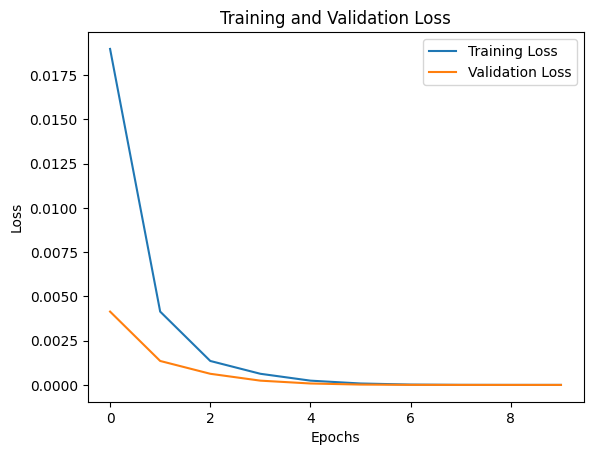

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    'sample_data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    'sample_data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# Train the model with validation data
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Exercise 2: Experiment with Different Optimizers

**Objective:** Experiment with different optimizers and observe their impact on model performance.

**Instructions:**
1. Change the optimizer from `adam` to `sgd` and `rmsprop`.
2. Retrain the model with each optimizer and compare the accuracy.


In [ ]:
from tensorflow.keras.models import clone_model
import matplotlib.pyplot as plt

# Function to reset the model weights
def reset_model(model):
    # Clone the model to reset weights
    model_clone = clone_model(model)
    model_clone.set_weights(model.get_weights())
    return model_clone

# Prepare to reset the model for each optimizer test
initial_model = reset_model(model)  # Assume 'model' is the initial compiled model

# Experiment with SGD optimizer
sgd_model = reset_model(initial_model)  # Reset model
sgd_model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
history_sgd = sgd_model.fit(train_generator, epochs=10, validation_data=validation_generator)

# Plot training and validation accuracy for SGD
plt.plot(history_sgd.history['accuracy'], label='Training Accuracy SGD')
plt.plot(history_sgd.history['val_accuracy'], label='Validation Accuracy SGD')
plt.title('Training and Validation Accuracy with SGD')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Experiment with RMSprop optimizer
rmsprop_model = reset_model(initial_model)  # Reset model
rmsprop_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history_rmsprop = rmsprop_model.fit(train_generator, epochs=10, validation_data=validation_generator)

# Plot training and validation accuracy for RMSprop
plt.plot(history_rmsprop.history['accuracy'], label='Training Accuracy RMSprop')
plt.plot(history_rmsprop.history['val_accuracy'], label='Validation Accuracy RMSprop')
plt.title('Training and Validation Accuracy with RMSprop')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Exercise 3: Evaluate the Model on a Test Set

**Objective:** Evaluate the fine-tuned model on an unseen test set to assess its generalization performance.

**Instructions:**
1. Load a separate test set.
2. Evaluate the model on this test set and report the accuracy and loss.


In [8]:
# Load and preprocess the test dataset
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    'sample_data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Evaluate the fine-tuned model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss:.4f}')


Found 20 images belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 1.0000 - loss: 5.0695e-08
Test Accuracy: 100.00%
Test Loss: 0.0000


### Summary

By completing these exercises, students will:

1. Visualize the training and validation loss to gain insights into the training process.
2. Experiment with different optimizers to understand their impact on model performance.
3. Evaluate the fine-tuned model on an unseen test set to assess its generalization capability.


#### Conclusion

Congratulations! In this lab, you have successfully implemented transfer learning using a pre-trained model in Keras. This lab exercise demonstrated how to train and fine-tune the model by unfreezing some of the layers.


Copyright © IBM Corporation. All rights reserved.
